## Training the model ##

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 10000)

df = pd.read_csv("sales_data.csv",index_col="date", parse_dates=True)
df

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


In [2]:
df.shape

(913000, 3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   store   913000 non-null  int64
 1   item    913000 non-null  int64
 2   sales   913000 non-null  int64
dtypes: int64(3)
memory usage: 27.9 MB


In [4]:
df["sales"].describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64

In [5]:
df["item"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [6]:
df["store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [7]:
store_data = df
store_data.insert(0, "date", store_data.index)
store_data.insert(3, 'day', pd.DatetimeIndex(store_data["date"]).day)
store_data.insert(4, 'month', pd.DatetimeIndex(store_data["date"]).month)
store_data.insert(5, 'year', pd.DatetimeIndex(store_data["date"]).year)
store_data

,date,store,item,day,month,year,sales
date,,,,,,,
2013-01-01,2013-01-01,1,1,1,1,2013,13
2013-01-02,2013-01-02,1,1,2,1,2013,11
2013-01-03,2013-01-03,1,1,3,1,2013,14
2013-01-04,2013-01-04,1,1,4,1,2013,13
2013-01-05,2013-01-05,1,1,5,1,2013,10
...,...,...,...,...,...,...,...
2017-12-27,2017-12-27,10,50,27,12,2017,63
2017-12-28,2017-12-28,10,50,28,12,2017,59
2017-12-29,2017-12-29,10,50,29,12,2017,74


In [8]:
store_data["year"].unique()

array([2013, 2014, 2015, 2016, 2017])

In [9]:
store_data["month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [10]:
store_data["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [11]:
store_data['date'] = pd.to_datetime(store_data['date'])

<AxesSubplot:xlabel='date'>

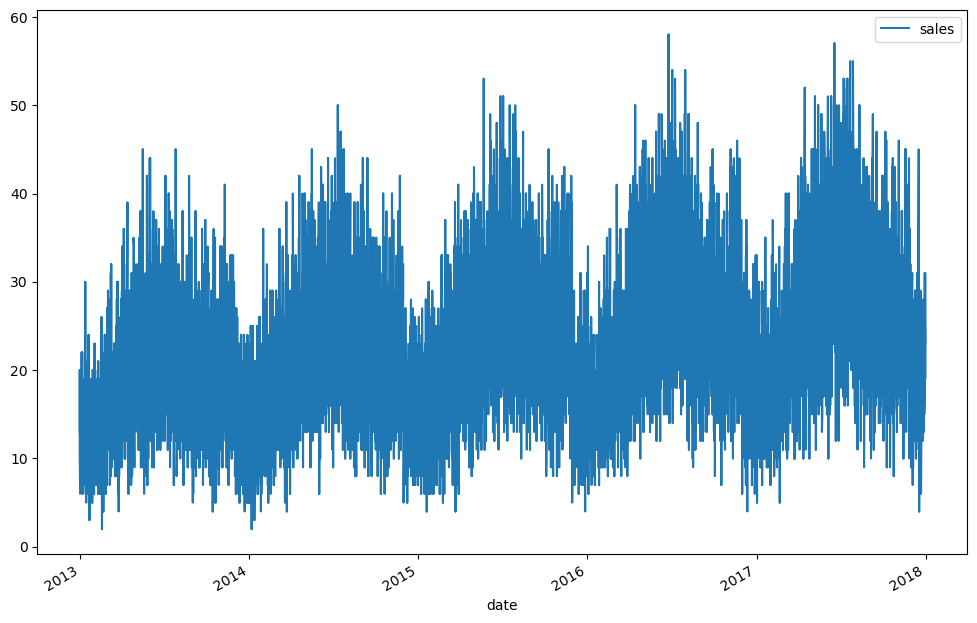

In [12]:
plot_df = store_data.iloc[0:10000,:]
plot_df["sales"].plot(figsize = (12,8), legend=True)

In [13]:
X = store_data.iloc[:,1:6]
Y = store_data.iloc[:,6:7]

In [14]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(np.array(X), np.array(Y), test_size=0.3, random_state=1, shuffle=True)

dtr = tree.DecisionTreeRegressor()
dtr.fit(x_train, y_train.flatten())
pred = dtr.predict(x_test)
mean_absolute_error(pred, y_test.flatten())

10.602029937933553

In [15]:
pred_data = pd.DataFrame(x_test, columns=["store", "item", "day", "month", "year"])

In [16]:
pred_data["sales"] = y_test

In [17]:
pred_data["pred"] = pred

In [18]:
pred_data["sales - pred"] = (pred_data["sales"] - pred_data["pred"])

In [19]:
pred_data["sales - pred"].mean()

-0.016042351223074115

In [20]:
pred_data

,store,item,day,month,year,sales,pred,sales - pred
0,9,43,26,9,2015,58,55.0,3.0
1,5,5,3,9,2017,22,17.0,5.0
2,4,40,27,1,2016,17,12.0,5.0
3,9,8,18,12,2013,56,53.0,3.0
4,4,5,16,11,2013,12,15.0,-3.0
...,...,...,...,...,...,...,...,...
273895,7,5,19,2,2017,8,11.0,-3.0
273896,6,21,14,7,2014,35,33.0,2.0
273897,4,25,30,1,2013,45,40.0,5.0
273898,9,9,27,11,2014,59,46.0,13.0


## Generating prediction data from user input ##

In [23]:
import pandas as pd
from datetime import date

today = date.today()
dates = pd.Series(pd.date_range(today.strftime("%Y/%m/%d"), freq="D", periods=90).strftime("%Y-%m-%d"))
dates = pd.DataFrame(dates, columns=["date"])
dates

,date
0,2023-03-05
1,2023-03-06
2,2023-03-07
3,2023-03-08
4,2023-03-09
5,2023-03-10
6,2023-03-11
7,2023-03-12
8,2023-03-13
9,2023-03-14


In [24]:
from itertools import product
    
def sales_pred(item_id): 
    
    store_range = pd.Series(range(1,11))
    item = pd.Series(range(item_id,item_id + 1))
    
    predict_data = pd.DataFrame(list(product(dates["date"], store_range,item)), columns=["date","store","item"])
    predict_data.insert(3, 'day', pd.DatetimeIndex(predict_data["date"]).day)
    predict_data.insert(4, 'month', pd.DatetimeIndex(predict_data["date"]).month)
    predict_data.insert(5, 'year', pd.DatetimeIndex(predict_data["date"]).year)
    
    x_test_data = predict_data.iloc[:,1:6]
    pred_res = dtr.predict(np.array(x_test_data))
    predict_data["pred_data"] = pred_res.astype(int)
    
    print("sales prediction for the next 90 days :")
    print(predict_data["pred_data"].sum())

### Predict Sales ###

In [26]:
#pass the item id as parameter to get the sales prediction for next three months
sales_pred(10)

sales prediction for the next 90 days :
76932
